# Kernel methods for biological sequence classification

MVA 2019 - Kernel methods for machine learning

*Éloïse Berthier, Guillaume Dalle, Clément Mantoux*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import backend
from kernels import LinearKernel, GaussianKernel

In [44]:
suffix = "cattrans6-spectr6"
kernels = [LinearKernel()]
lambdas = np.logspace(-2.5, 0., 5)

Tuning lambda on dataset 0 with kernel linear and params {}: 100%|██████████| 5/5 [00:30<00:00,  6.03s/it]


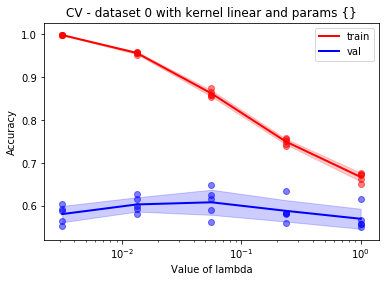

Tuning lambda on dataset 1 with kernel linear and params {}: 100%|██████████| 5/5 [00:29<00:00,  5.91s/it]


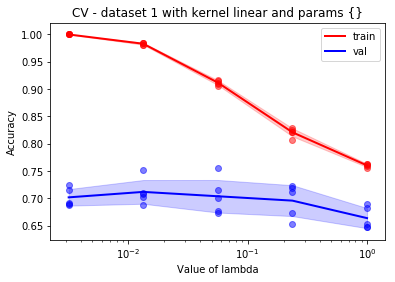

Tuning lambda on dataset 2 with kernel linear and params {}: 100%|██████████| 5/5 [00:30<00:00,  6.08s/it]


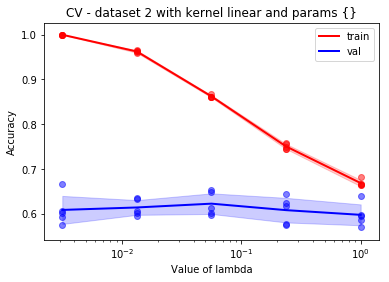

In [45]:
best_kernels, best_lambdas = backend.tune_parameters(suffix, kernels, lambdas, plot=True)

In [46]:
backend.final_prediction(suffix, best_kernels, best_lambdas)

DATASET 0
DATASET 1
DATASET 2
